# Homework 4: Text Classification

In this homework, you will work with a dataset composed of the posts from Tweetter. The goal is to identify if there is an emergency information in the tweet or not. This is a binary classification task.

\

We will use a dataset from Kaggle contest: https://www.kaggle.com/competitions/nlp-getting-started/data Download train.csv file (test.csv files in competitions typically do not have labels available, only organizers know them and use to validate the submissions). The code below will split the first file into train and validation sets.

*In case you don't want to register on Kaggle or use your gmail account, sent me e-mail and I'll send you the dataset*

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


## Q1 (1pt)

Print information about missing values. Fill in missing values with an empty string [Example in SGD notebook](https://github.com/anton-selitskiy/RIT_ML/blob/main/2025_spring/Week04_SGD/ML7.ipynb) in ceaning of the Automobiles dataset.

In [4]:
data.isnull().sum()

,0
id,0
keyword,61
location,2533
text,0
target,0


In [5]:
data.loc[:, data.dtypes == "object"] = data.loc[:, data.dtypes == "object"].fillna("")

In [6]:
data.isnull().sum()

,0
id,0
keyword,0
location,0
text,0
target,0


Now we will split our data into Test, Validation, and Test sets. You don't want to use Test set untill Q10.

In [7]:
from sklearn.model_selection import train_test_split

train, validation = train_test_split(data, test_size=0.3, random_state=42)

In [8]:
validation, test = train_test_split(validation, test_size=0.4, random_state=42)

## Q2 (2pt)

1. What is the distribution of the classes in the Training set? (Count the fractions of classes, to understand if they are balanced or not.)

2. Plot the bar-plot for 10 mostly frequent values in the column "keyword".

Comment on the information you've seen.

In [9]:
class_distribution = train['target'].value_counts(normalize=True)

In [10]:
class_distribution

,proportion
target,
0,0.567461
1,0.432539


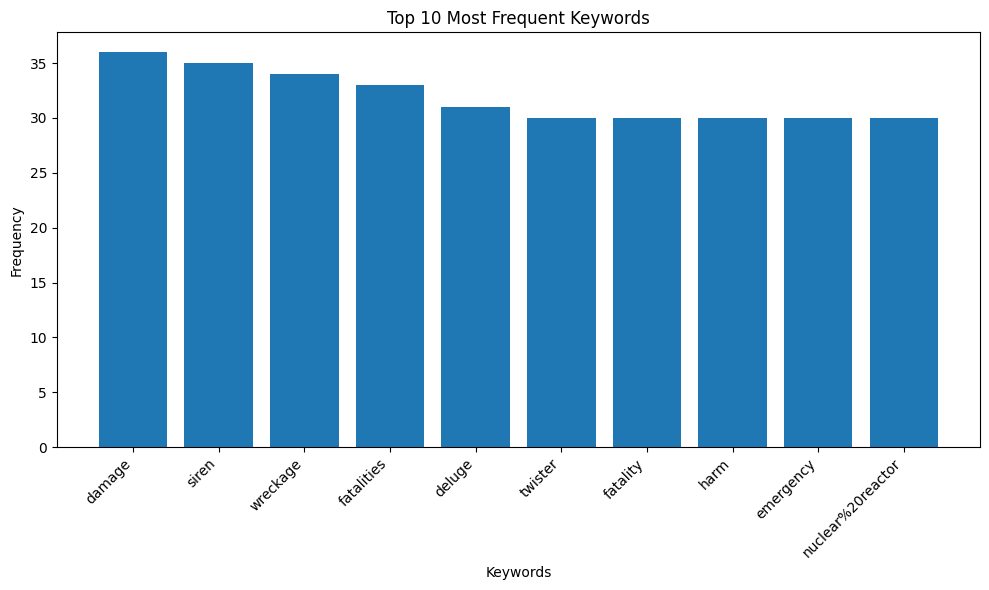

In [11]:
import matplotlib.pyplot as plt

keyword_counts = train['keyword'][train['keyword'] != ""].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
plt.bar(keyword_counts.index, keyword_counts.values)
plt.xlabel("Keywords")
plt.ylabel("Frequency")
plt.title("Top 10 Most Frequent Keywords")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

I would say that my dataset is pretty balanced because the numbers are close to a 50/50 split. This means my model should be able to learn effectively from both classes and generalize well to new data.

As far as the plot goes, while most keywords seem relevant to emergency situations, further analysis is needed to understand the full vocabulary used in such tweets. The spread is pretty equal amongst the keywords though.

## Q3 (1pt)

Join text columns in a new column and delete the column with id.

In [12]:
# Concatenate keyword, location, and text for the training set
train['Concatenated'] = train['keyword'].fillna('') + " " + train['location'].fillna('') + " " + train['text']

# Drop unnecessary columns from the training set
train = train.drop(['id', 'keyword', 'location', 'text'], axis=1)

# Reorder columns in the training set
train = train[['target', 'Concatenated']]

# Set target as the index for the training set
train.set_index('target', inplace=True)

In [13]:
train = train.reset_index()

In [14]:
train

,target,Concatenated
0,0,bridge%20collapse Ashes 2015: AustraliaÛªs c...
1,1,"hail Carol Stream, Illinois GREAT MICHIGAN TEC..."
2,1,police Houston CNN: Tennessee movie theater s...
3,1,rioting Still rioting in a couple of hours le...
4,0,wounds Lake Highlands Crack in the path where ...
...,...,...
5324,0,obliteration Merica! @Eganator2000 There aren'...
5325,0,panic just had a panic attack bc I don't have...
5326,0,blood Omron HEM-712C Automatic Blood Pressure...
5327,1,Officials say a quarantine is in place at an...


## Q4 (1pt)

Work with train set.

1. Transform the data using CountVectorizer.
2. What is the shape of the resulted matrix?


In [15]:
from sklearn.feature_extraction.text import CountVectorizer

In [16]:
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(train['Concatenated'])
X_train_vec.shape

(5329, 18455)

## Q5 (2pt)

The matrix in the previous question has many columns. Let's take a look at the dictionary of tokens, method *.vocabulary_* of CountVectorizer object.

1. Find all the words in this dictionary that contain digits. How many such words were found?

2. Find all the words that contain punctuation characters. How many such words were found?

In [17]:
import re

In [18]:
digit_words = [word for word, index in vectorizer.vocabulary_.items() if re.search(r'\d', word)]
print(f"Number of words containing digits: {len(digit_words)}")

Number of words containing digits: 3812


In [19]:
punctuation_words = [word for word, index in vectorizer.vocabulary_.items() if re.search(r'[^\w\s]', word)]
print(f"Number of words containing punctuation characters: {len(punctuation_words)}")

Number of words containing punctuation characters: 0


## Q6 (1pt)

During the lecture, we learned that there is a special text tokenizer in NLTK called *TweetTokenizer.* Let's try to apply *CountVectorizer* with this tokenizer. Answer all the questions from the previous section using TweetTokenizer and compare the results.

In [20]:
from nltk.tokenize import TweetTokenizer

In [21]:
tweet_tokenizer = TweetTokenizer()
vectorizer_tweet = CountVectorizer(tokenizer=tweet_tokenizer.tokenize)
X_train_vec_tweet = vectorizer_tweet.fit_transform(train['Concatenated'])
X_train_vec_tweet.shape

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(5329, 19670)

In [22]:
digit_words_tweet = [word for word, index in vectorizer_tweet.vocabulary_.items() if re.search(r'\d', word)]
print(f"Number of words containing digits with TweetTokenizer: {len(digit_words_tweet)}")

punctuation_words_tweet = [word for word, index in vectorizer_tweet.vocabulary_.items() if re.search(r'[^\w\s]', word)]
print(f"Number of words containing punctuation characters with TweetTokenizer: {len(punctuation_words_tweet)}")

Number of words containing digits with TweetTokenizer: 3939
Number of words containing punctuation characters with TweetTokenizer: 7312


## Q7 (4pt)

In scikit-learn, we can evaluate the process of counting matrices using CountVectorizer. CountVectorizer, like other inheritors of the _VectorizerMixin, has arguments tokenizer and preprocessor. The preprocessor is applied at the very beginning to each line of your dataset, while the tokenizer takes a string and returns tokens.

Let's write a custom tokenizer that will do everything we need:

1. Convert all letters to lowercase.
2. Split the text into tokens using *TweetTokenizer* from the *nltk* package.
3. Remove all tokens that contain non-Latin characters, except for emojies (we'll consider tokens containing only punctuation and at least one parenthesis as emoticons) and hashtags that contain only Latin letters after the initial #.
4. Remove all tokens listed in nltk.corpus.stopwords.words('english').
5. Perform stemming using *SnowballStemmer.*

Demonstrate the operation of your function on the first text in the training dataset. You can access it by *.iloc[0]*

Usefull site on regular expressions: https://regex101.com/

In [24]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

In [25]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [26]:
stemmer = SnowballStemmer('english')

In [30]:
def custom_tokenizer(text):
    # Lowercase transformation
    text = text.lower()

    # Tokenize using TweetTokenizer
    tokens = TweetTokenizer().tokenize(text)

    # Filter tokens based on criteria
    filtered_tokens = []
    for token in tokens:
        # Keep tokens that contain only Latin characters, "smileys", or valid hashtags
                # Keep tokens that contain only Latin characters
        if re.fullmatch(r'[a-zA-Z]+', token):
            filtered_tokens.append(token)
        # Keep "smileys" (tokens with only punctuation and at least one parenthesis)
        elif re.fullmatch(r'[^\w\s]*[\(\)][^\w\s]*', token):
            filtered_tokens.append(token)
        # Keep valid hashtags (start with # and contain only Latin letters after)
        elif re.fullmatch(r'#[a-zA-Z]+', token):
            filtered_tokens.append(token)
        # Keep emojies, which are defined as containing only punctuation characters
        elif re.fullmatch(r'[^\w\s]+', token):
            filtered_tokens.append(token)


    # Debugging: Print filtered tokens before stopword removal
    print("Filtered Tokens (Before Stopwords Removal):", filtered_tokens)


    # Remove stopwords
    filtered_tokens = [token for token in filtered_tokens if token not in stopwords.words('english')]

    # Perform stemming
    stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]

    return stemmed_tokens

In [31]:
custom_tokenizer(train['Concatenated'].iloc[0])

Filtered Tokens (Before Stopwords Removal): ['bridge', '%', 'ashes', ':', 'australia', '\x89', 'collapse', 'at', 'trent', 'bridge', 'among', 'worst', 'in', 'history', ':', 'england', 'bundled', 'out', 'australia', 'for', '...']


['bridg',
 '%',
 'ash',
 ':',
 'australia',
 '\x89',
 'collaps',
 'trent',
 'bridg',
 'among',
 'worst',
 'histori',
 ':',
 'england',
 'bundl',
 'australia',
 '...']

In [29]:
test_text = "Hello world!!! This is a test of the custom tokenizer :) #Test123 🤔"
result = custom_tokenizer(test_text)
print(result)

['hello', 'world', '!', '!', '!', 'test', 'custom', 'token', ':)', '🤔']


## Q8 (2pt)

1. Apply *CountVectorizer* with your tokenizer to the Train and Validation sets.
2. Train *LogisticRegression* on the features obtained.
3. Calculate f1-score on the validation set.

In [ ]:
from sklearn.linear_model import LogisticRegression

## Q9 (2pt)

1. Repeat Q8, but with a TF-IDF vectorizer. How did the quality change?

2. We can further reduce the size of our matrix by discarding *df* values close to one. Most likely, such words do not carry much information about the category since they occur quite frequently. Limit the maximum df in the parameters of TfIdfVectorizer, set the upper limit to 0.9. How did the matrix size change, and how did the quality change?

3. We can also reduce the size of the matrix by removing words with very small *df* values. Were you able to improve the quality by doing this?

For example, min_df = 5 means ignore words that appear less than in 5 documents.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

## Q10 (2pt)

Evaluate the best model. The minimal value of f1-score on the Test data should be at least 0.75.

## Q11 (2pt)
Visualize the most important features (use class notebook).